In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as num

In [2]:
#load files
invoice = pd.read_csv(r"C:\Users\franc\Downloads\fct_invoice.csv")
customer = pd.read_json(r"C:\Users\franc\Downloads\dim_customer.json")

In [3]:
customer #for reference

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [4]:
invoice #for reference

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


EASY: 1. How many unique customers are in the dataset?

In [5]:
customer['id'].nunique()

5191

EASY: 2. What are the different categories of products available? How many unique categories are there?

In [6]:
print(', '.join(list(invoice['category'].unique())))
print(invoice['category'].nunique())

Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir
8


EASY: 3. Which payment method is the most popular? How many times was it used?

In [7]:
print(max(invoice['payment_method']))
list(invoice[invoice['payment_method'] == max(invoice['payment_method'])].count())[0]

Debit Card


20079

MEDIUM: 1. What are the three most popular categories, by total sales?

In [8]:
invoice['total sales'] = invoice['quantity']*invoice['price']
invoice.groupby(['category'])['total sales'].sum().head(3)

category
Books        8.345529e+05
Clothing     1.139968e+08
Cosmetics    6.792863e+06
Name: total sales, dtype: float64

MEDIUM: 2. What are the total sales attributed to customers over the age of 45?

In [9]:
customerage = pd.merge(invoice, customer, left_on='customer_id', right_on='id')
customerage[customerage['age']>45]['total sales'].sum()

82039768.15

MEDIUM: 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

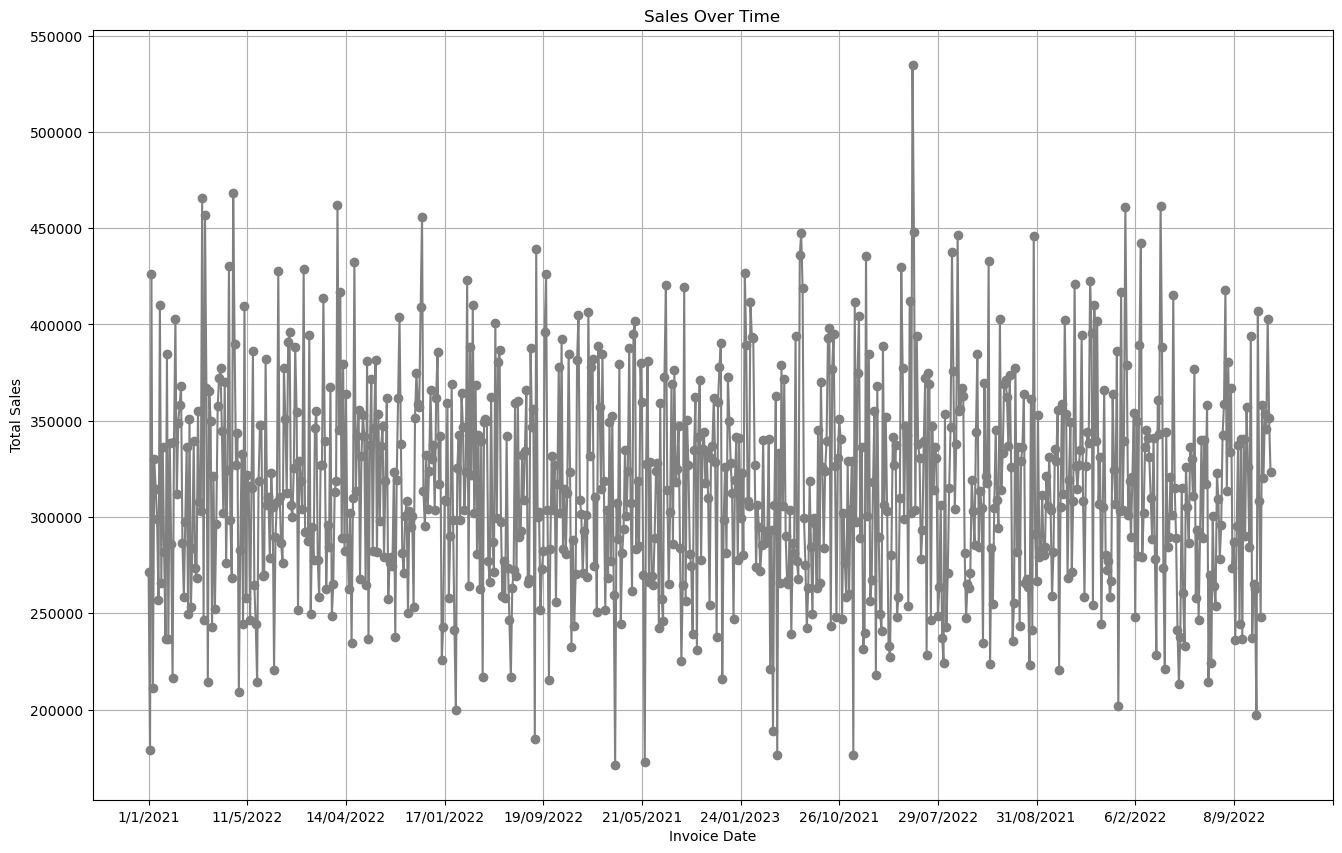

In [24]:
values = invoice.groupby('invoice_date')['total sales'].sum()
plt.figure(figsize=(16,10))
plt.plot(values.index, values.values, linestyle = '-', marker = 'o', color = 'gray')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.grid(True)
plt.xticks(num.arange(0, 850, 70))
plt.show()

HARD: 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [43]:
bins = num.arange(0, 101, 10)

customerage['age range'] = pd.cut(customerage['age'], bins, labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
customerage.pivot_table(index = ['category', 'age range'], values = 'total sales', aggfunc = 'sum', observed = False)

total sales
category        age range             
Books           0-9               0.00
                10-19         19891.95
                20-29         80128.35
                30-39         84446.10
                40-49         82946.25
                50-59         79537.50
                60-69         76234.80
                70-79         56251.95
                80-89         21103.95
                90-99             0.00
Clothing        0-9               0.00
                10-19       3029007.52
                20-29      10079987.28
                30-39      11516170.16
                40-49      10933114.72
                50-59      10819684.48
                60-69      10004067.04
                70-79       7871098.40
                80-89       3739897.04
                90-99             0.00
Cosmetics       0-9               0.00
                10-19        178009.48
                20-29        594733.82
                30-39        722406.22
                40-49        656740.32
                50-59        621366.12
                60-69        599735.00
                70-79        427824.52
                80-89        214684.80
                90-99             0.00
Food & Beverage 0-9               0.00
                10-19         20433.61
                20-29         74271.23
                30-39         89187.19
                40-49         85034.57
                50-59         77686.42
                60-69         76127.88
                70-79         55584.44
                80-89         25334.12
                90-99             0.00
Shoes           0-9               0.00
                10-19       1367187.26
                20-29       6152942.84
                30-39       7178633.37
                40-49       6775319.13
                50-59       6268175.48
                60-69       5499357.71
                70-79       4718536.54
                80-89       2125201.97
                90-99             0.00
Souvenir        0-9               0.00
                10-19         20128.68
                20-29         53570.91
                30-39         63705.63
                40-49         65007.66
                50-59         57594.30
                60-69         51482.97
                70-79         38439.21
                80-89         20234.25
                90-99             0.00
Technology      0-9               0.00
                10-19       1772400.00
                20-29       5049450.00
                30-39       6231750.00
                40-49       5840100.00
                50-59       4662000.00
                60-69       5218500.00
                70-79       3773700.00
                80-89       1449000.00
                90-99             0.00
Toys            0-9               0.00
                10-19         98273.28
                20-29        380011.52
                30-39        426460.16
                40-49        378864.64
                50-59        357002.24
                60-69        340659.20
                70-79        285608.96
                80-89        126336.00
                90-99             0.00